# Importing Libraries

In [62]:
# Data Manipulation & Visualization
import os
import pandas as pd
import numpy as np
import seaborn as sns # used for plot interactive graph. 
sns.set_style('darkgrid')
import matplotlib.pyplot as plt


# Text Manipulation
from textblob import TextBlob #for polarity and subjectivity classification
import re
import nltk
from wordcloud import STOPWORDS
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import FreqDist, word_tokenize
from nltk.util import ngrams
from nltk import bigrams, trigrams
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
stopwords = set(STOPWORDS)

# Machine Learning
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import confusion_matrix,mean_squared_error,mean_absolute_error,log_loss,accuracy_score,classification_report
from sklearn.metrics import precision_score

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn import feature_extraction, linear_model, model_selection, preprocessing

In [19]:
pip install -U textblob


Requirement already up-to-date: textblob in c:\users\91767\anaconda3\lib\site-packages (0.15.3)Note: you may need to restart the kernel to use updated packages.



# Loading data

In [63]:
train = pd.read_csv("C:/Users/91767/Downloads/Product Sentiment Classification-AI_ML-Test-2/Train.csv")
test = pd.read_csv("C:/Users/91767/Downloads/Product Sentiment Classification-AI_ML-Test-2/Test.csv")
samp = pd.read_csv("C:/Users/91767/Downloads/Product Sentiment Classification-AI_ML-Test-2/Sample Submission.csv")

In [64]:
# we take only what we need
train = train[['Product_Description','Product_Type','Sentiment']]

In [65]:
train.columns

Index(['Product_Description', 'Product_Type', 'Sentiment'], dtype='object')

In [66]:
train.head()

,Product_Description,Product_Type,Sentiment
0,"The Web DesignerÛªs Guide to iOS (and Android) Apps, today @mention 10 a.m! {link} #sxsw",9,2
1,RT @mention Line for iPad 2 is longer today than yesterday. #SXSW // are you getting in line again today just for fun?,9,2
2,Crazy that Apple is opening a temporary store in Austin tomorrow to handle the rabid #sxsw eye pad too seekers.,9,2
3,"The lesson from Google One Pass: In this digital environment, users want to purchase across every platform with one tool. #sxsw #elonsxsw",9,2
4,"RT @mention At the panel: &quot;Your mom has an ipad, designing for boomers&quot; #sxsw",9,2


In [67]:
test.head(5)

,Text_ID,Product_Description,Product_Type
0,5786,RT @mention Going to #SXSW? The new iPhone guide to #Austin by @mention is free March 9-15. Hard to beat free. #lp,7
1,5363,"RT @mention 95% of iPhone and Droid apps have less than 1,000 downloads total. #SXSW",9
2,6716,RT @mention Thank you to @mention for letting me test drive a car to the Apple store. Now lets hope that they can fix my phone!! #sxsw,9
3,4339,#Thanks @mention we're lovin' the @mention app update on my iPhone. Be sure to download &amp; familiarize yourself w/ it before #SXSW #usguys,7
4,66,At #sxsw? @mention / @mention wanna buy you a drink. 7pm at Fado on 4th. {link} Join us!,9


In [68]:
samp.head(3)

,0,1,2,3
0,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00


# Text Cleaning

In [69]:
test_str = train.loc[0, 'Product_Description']

def clean_text(text):
    text = re.sub(r'\n',' ', text) # Remove line breaks
    text=  re.sub('@mention',' ', text )
    text=  re.sub('{link}',' ', text )
    text=  re.sub('Ûª',' ', text )
    text=  re.sub('  ',' ', text )
    text=  re.sub('RT',' ', text )
    text=  re.sub('//',' ', text )
    text=  re.sub('&quot',' ', text )
    text=  re.sub('&amp',' ', text )
    text=  re.sub(r'[^\w\s]',' ', text )
    text=  re.sub(' +',' ', text )
    return text

def process_text(df):
    df['description'] = df['Product_Description'].apply(lambda x: clean_text(x))
    return df

print("Original text: " + test_str)
print("Cleaned text: " + clean_text(test_str))

Original text: The Web DesignerÛªs Guide to iOS (and Android) Apps, today @mention 10 a.m! {link} #sxsw
Cleaned text: The Web Designer s Guide to iOS and Android Apps today 10 a m sxsw


In [70]:
train = process_text(train)
test = process_text(test)
train.drop('Product_Description',1,inplace=True)
test.drop('Product_Description',1,inplace=True)


In [71]:
train.head(3)

,Product_Type,Sentiment,description
0,9,2,The Web Designer s Guide to iOS and Android Apps today 10 a m sxsw
1,9,2,Line for iPad 2 is longer today than yesterday SXSW are you getting in line again today just for fun
2,9,2,Crazy that Apple is opening a temporary store in Austin tomorrow to handle the rabid sxsw eye pad too seekers


In [72]:
test.head(3)

,Text_ID,Product_Type,description
0,5786,7,Going to SXSW The new iPhone guide to Austin by is free March 9 15 Hard to beat free lp
1,5363,9,95 of iPhone and Droid apps have less than 1 000 downloads total SXSW
2,6716,9,Thank you to for letting me test drive a car to the Apple store Now lets hope that they can fix my phone sxsw


# Polarity and Subjectivity

In [73]:
def getSubjectivity(description):
   return TextBlob(description).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(description):
   return  TextBlob(description).sentiment.polarity

def getanalysis(score):
    if score < 0:
      return 'negative'
    elif score == 0:
      return 'neutral'
    else:
      return 'positive'

def spellcheck(description):
    return TextBlob(description).correct()

# Create two new columns 'Subjectivity' & 'Polarity'
train['subjectivity'] = train['description'].apply(getSubjectivity)

train['polarity'] = train['description'].apply(getPolarity)

train['label'] = train['polarity'].apply(getanalysis)

train['text_token'] = train['description'].apply(lambda x: word_tokenize(x))

stemming = PorterStemmer()
train['text_stemmed'] = train['text_token'].apply(lambda x: " ".join([stemming.stem(i) for i in x]))

lemmatizing = WordNetLemmatizer()
train['text_lemmatized'] = train['text_token'].apply(lambda x: " ".join([lemmatizing.lemmatize(i) for i in x]))
# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
train.head(3)

,Product_Type,Sentiment,description,subjectivity,polarity,label,text_token,text_stemmed,text_lemmatized
0,9,2,The Web Designer s Guide to iOS and Android Apps today 10 a m sxsw,0.00,0.00,neutral,"[The, Web, Designer, s, Guide, to, iOS, and, Android, Apps, today, 10, a, m, sxsw]",the web design s guid to io and android app today 10 a m sxsw,The Web Designer s Guide to iOS and Android Apps today 10 a m sxsw
1,9,2,Line for iPad 2 is longer today than yesterday SXSW are you getting in line again today just for fun,0.20,0.30,positive,"[Line, for, iPad, 2, is, longer, today, than, yesterday, SXSW, are, you, getting, in, line, again, today, just, for, fun]",line for ipad 2 is longer today than yesterday sxsw are you get in line again today just for fun,Line for iPad 2 is longer today than yesterday SXSW are you getting in line again today just for fun
2,9,2,Crazy that Apple is opening a temporary store in Austin tomorrow to handle the rabid sxsw eye pad too seekers,0.90,-0.60,negative,"[Crazy, that, Apple, is, opening, a, temporary, store, in, Austin, tomorrow, to, handle, the, rabid, sxsw, eye, pad, too, seekers]",crazi that appl is open a temporari store in austin tomorrow to handl the rabid sxsw eye pad too seeker,Crazy that Apple is opening a temporary store in Austin tomorrow to handle the rabid sxsw eye pad too seeker


# EDA

In [74]:
train['description'].head(3)

0                                                The Web Designer s Guide to iOS and Android Apps today 10 a m sxsw
1             Line for iPad 2 is longer today than yesterday SXSW are you getting in line again today just for fun 
2    Crazy that Apple is opening a temporary store in Austin tomorrow to handle the rabid sxsw eye pad too seekers 
Name: description, dtype: object

In [75]:
words = train['text_token']
words[0]

['The',
 'Web',
 'Designer',
 's',
 'Guide',
 'to',
 'iOS',
 'and',
 'Android',
 'Apps',
 'today',
 '10',
 'a',
 'm',
 'sxsw']

In [76]:
test['description'].head(3)

0                           Going to SXSW The new iPhone guide to Austin by is free March 9 15 Hard to beat free lp
1                                             95 of iPhone and Droid apps have less than 1 000 downloads total SXSW
2     Thank you to for letting me test drive a car to the Apple store Now lets hope that they can fix my phone sxsw
Name: description, dtype: object

### Most Common Words


In [77]:
import itertools
import collections

In [78]:
from itertools import product
from collections import OrderedDict

In [79]:
#all words in all tweets
all_words = list(itertools.chain(*words))

count_words = collections.Counter(all_words)

count_words.most_common(15)

[('SXSW', 3356),
 ('sxsw', 3232),
 ('the', 2741),
 ('to', 2457),
 ('at', 2044),
 ('for', 1684),
 ('Google', 1564),
 ('iPad', 1523),
 ('a', 1520),
 ('in', 1327),
 ('Apple', 1320),
 ('of', 1184),
 ('is', 1162),
 ('and', 1072),
 ('I', 1018)]

In [80]:
train_count_words = pd.DataFrame(count_words.most_common(15), columns=['word', 'count'])
train_count_words.head()

,word,count
0,SXSW,3356
1,sxsw,3232
2,the,2741
3,to,2457
4,at,2044


### Histogram of most common words

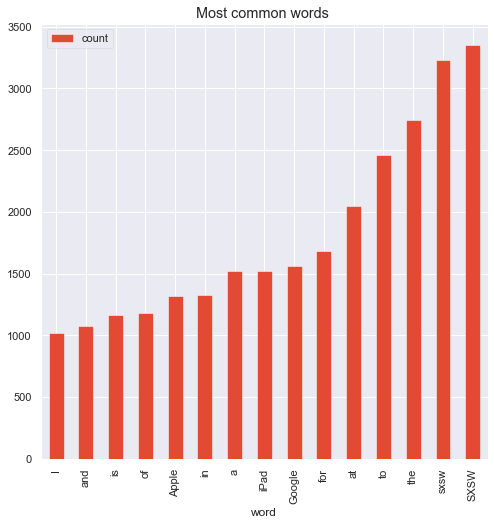

In [23]:
fig, ax = plt.subplots(figsize=(8,8))
train_count_words.sort_values(by='count').plot.bar(x='word', y='count',
                                               ax=ax)
ax.set_title("Most common words ")
plt.show()

# Bi-grams

In [30]:
from nltk.util import ngrams
for text in all_words:
    token = nltk.word_tokenize(text)
    bigram = list(ngrams(token, 2))

### Most common Bi-grams

In [31]:
six = ngrams(all_words, 2)
six_count = collections.Counter(six)
six_count.most_common(20)

[(('at', 'SXSW'), 773),
 (('iPad', '2'), 630),
 (('at', 'sxsw'), 467),
 (('pop', 'up'), 312),
 (('for', 'SXSW'), 305),
 (('at', 'the'), 272),
 (('an', 'iPad'), 270),
 (('in', 'Austin'), 247),
 (('Google', 'to'), 226),
 (('Social', 'Network'), 220),
 (('store', 'in'), 215),
 (('New', 'Social'), 212),
 (('the', 'iPad'), 211),
 (('to', 'Launch'), 208),
 (('in', 'the'), 199),
 (('Network', 'Called'), 198),
 (('Called', 'Circles'), 197),
 (('up', 'store'), 192),
 (('Launch', 'Major'), 187),
 (('Major', 'New'), 187)]

In [32]:
train_bigram = pd.DataFrame(six_count.most_common(20), columns=['bigram', 'count'])
train_bigram.head()

,bigram,count
0,"(at, SXSW)",773
1,"(iPad, 2)",630
2,"(at, sxsw)",467
3,"(pop, up)",312
4,"(for, SXSW)",305


### Polarity Histogram

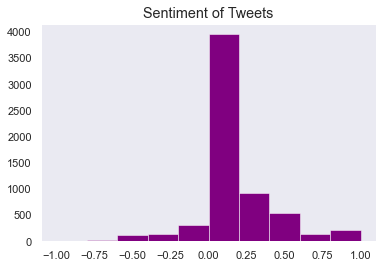

In [36]:
train['polarity'].hist(color='purple')
plt.grid(False)
plt.title("Sentiment of Tweets")
plt.show()

### Polarity(labels) Histogram

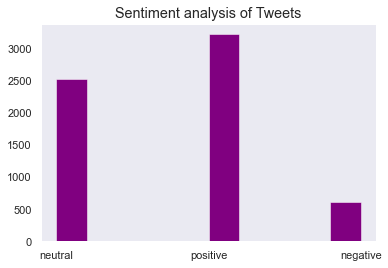

In [37]:
train['label'].hist(color='purple')
plt.grid(False)
plt.title("Sentiment analysis of Tweets")
plt.show()

### Subjectivity Histogram

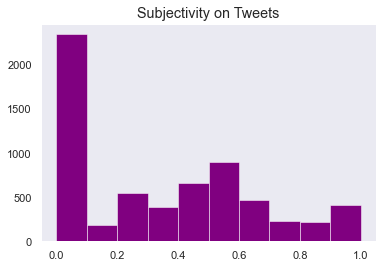

In [38]:
train['subjectivity'].hist(color='purple')
plt.grid(False)
plt.title("Subjectivity on Tweets")
plt.show()

### Scatter Plot - Polarity vs Subjectivity

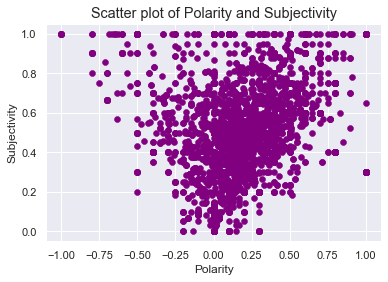

In [41]:
plt.scatter(train['polarity'], train['subjectivity'], color='purple')
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.title("Scatter plot of Polarity and Subjectivity")
plt.show()

# EDA

No handles with labels found to put in legend.


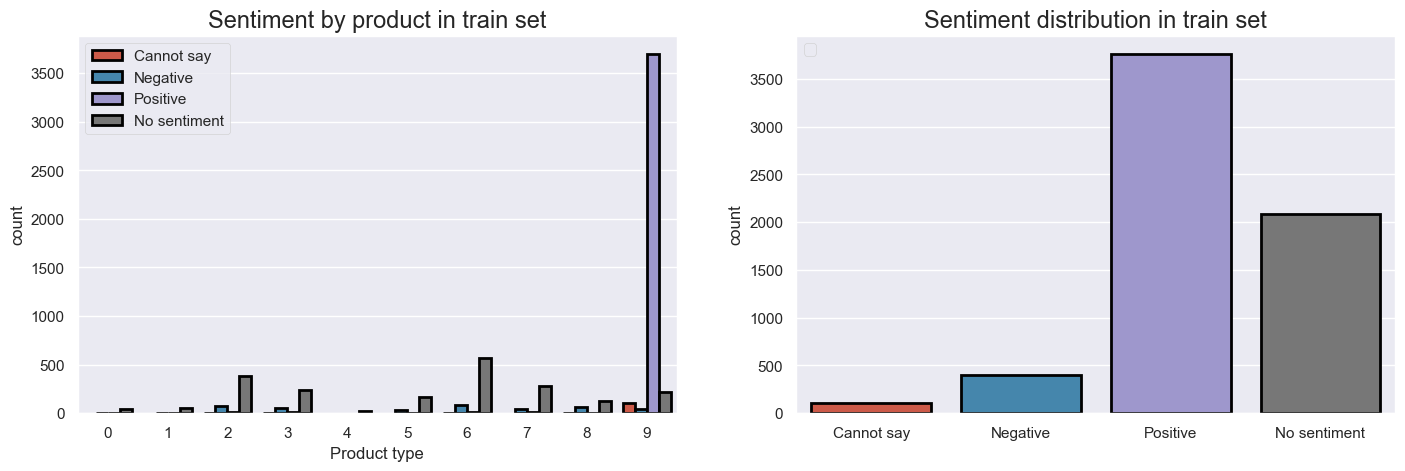

In [45]:
fig,ax = plt.subplots(ncols=2,nrows=1,dpi=100,figsize=(17,5))
sns.countplot(data=train,x="Product_Type",hue="Sentiment",edgecolor="black",ax=ax[0],linewidth=2)
ax[0].legend(loc="upper left",labels=["Cannot say","Negative","Positive","No sentiment"])
ax[0].set_title('Sentiment by product in train set',size=17)
ax[0].set_xlabel("Product type")

sns.countplot(data=train,x="Sentiment",edgecolor="black",ax=ax[1],linewidth=2)
ax[1].legend(loc="upper left")
ax[1].set_title('Sentiment distribution in train set',size=17)
ax[1].set_xticklabels(["Cannot say","Negative","Positive","No sentiment"])
ax[1].set_xlabel("")

plt.show() 


In [46]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

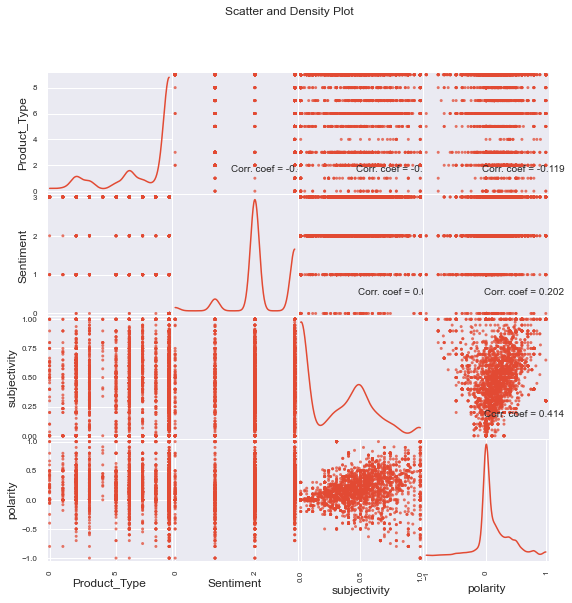

In [47]:
plotScatterMatrix(train, 9, 10)

# Text Analysis

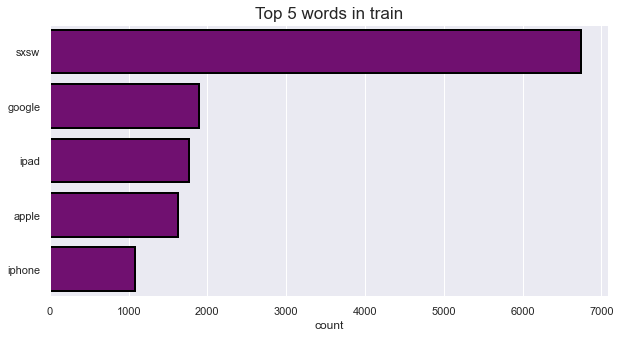

In [55]:
plt.figure(figsize=(10,5))
word_freq = FreqDist(w for w in word_tokenize(' '.join(train['description']).lower()) if 
                     (w not in stopwords) & (w.isalpha()))
df_word_freq = pd.DataFrame.from_dict(word_freq, orient='index', columns=['count'])
top20w = df_word_freq.sort_values('count',ascending=False).head(5)
last20w=df_word_freq.sort_values('count',ascending=False).tail(5)

sns.barplot(top20w['count'],top20w.index,color='purple',edgecolor="black",linewidth=2)
plt.title("Top 5 words in train",size=17)
plt.show()

# Top 10 Bigrams and Trigrams

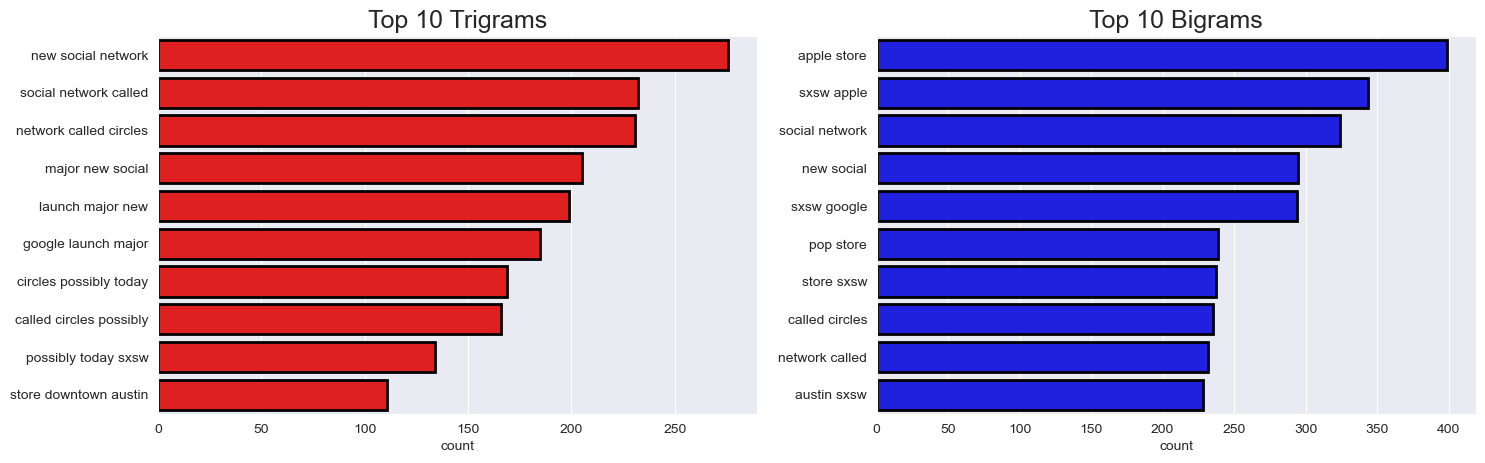

In [18]:
fig,axes=plt.subplots(ncols=2,figsize=(17,5),dpi=100)
###bigrams
bigram = list(bigrams([w for w in word_tokenize(' '.join(train['description']).lower()) if 
              (w not in stopwords) & (w.isalpha())]))
fq = FreqDist(bg for bg in bigram)
bgdf = pd.DataFrame.from_dict(fq, orient='index', columns=['count'])
bgdf.index = bgdf.index.map(lambda x: ' '.join(x))
bgdf = bgdf.sort_values('count',ascending=False)

#trigrams
trigram = list(trigrams([w for w in word_tokenize(' '.join(train['description']).lower()) if 
              (w not in stopwords) & (w.isalpha())]))
tr_fq = FreqDist(bg for bg in trigram)
trdf = pd.DataFrame.from_dict(tr_fq, orient='index', columns=['count'])
trdf.index = trdf.index.map(lambda x: ' '.join(x))
trdf = trdf.sort_values('count',ascending=False)

sns.barplot(bgdf.head(10)['count'], bgdf.index[:10], ax=axes[1],color='blue',edgecolor='black',linewidth=2)
sns.barplot(trdf.head(10)['count'], trdf.index[:10],ax=axes[0], color='red',edgecolor='black',linewidth=2)

axes[0].set_title('Top 10 Trigrams',size=18)
axes[1].set_title('Top 10 Bigrams',size=18)

plt.show()

# WordCloud

In [1]:
from autoviml.Auto_ViML import Auto_ViML

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\91767\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\91767\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\91767\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\91767\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\91767\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]   


Imported Auto_NLP version: 0.0.45.. Call using:
     train_nlp, test_nlp, nlp_pipeline, predictions = Auto_NLP(
                nlp_column, train, test, target, score_type='balanced_accuracy',
                modeltype='Classification',top_num_features=200, verbose=0,
                build_model=True)
Imported Auto_ViML version: 0.1.669. Call using:
             m, feats, trainm, testm = Auto_ViML(train, target, test,
                            sample_submission='',
                            scoring_parameter='', KMeans_Featurizer=False,
                            hyper_param='RS',feature_reduction=True,
                             Boosting_Flag='CatBoost', Binning_Flag=False,
                            Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False,
                            verbose=1)
            
To remove previous versions, perform 'pip uninstall autoviml'
    NEW! Auto_ViML can solve multi-label, multi-output problems!
To get the latest version, perform "pip instal

In [51]:
train = pd.read_csv("C:/Users/91767/Downloads/Product Sentiment Classification-AI_ML-Test-2/Train.csv")
test = pd.read_csv("C:/Users/91767/Downloads/Product Sentiment Classification-AI_ML-Test-2/Test.csv")
samp = pd.read_csv("C:/Users/91767/Downloads/Product Sentiment Classification-AI_ML-Test-2/Sample Submission.csv")

In [52]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 6364):
  review = re.sub('[^a-zA-Z]', ' ', train['Product_Description'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.append('sxsw')
  all_stopwords.append('continues')
  all_stopwords.append('oil')
  all_stopwords.append('delivering')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91767\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [53]:
print(corpus)

['web design guid io android app today mention link', 'rt mention line ipad longer today yesterday get line today fun', 'crazi appl open temporari store austin tomorrow handl rabid eye pad seeker', 'lesson googl one pass digit environ user want purchas across everi platform one tool elonsxsw', 'rt mention panel quot mom ipad design boomer quot', 'rt mention think ef hubbi line ipad someon point toward line wife number sxswi', 'quot android user iphon user use option menu contextu menu quot mention', 'wow rt mention interrupt regularli schedul geek program big news link googl circl', 'googl launch new social network call circl possibl today link link', 'mention welcom enjoy ride anywher austin dwnld groundlink app link booth', 'rt mention appl plan keep austin wire open pop appl store link', 'yeay rt mention new ubersoci iphon app store includ uberguid sponsor masha link', 'know season app updat whenev open iphon app store', 'rt mention rt mention arriv us look microsim data iphon recom

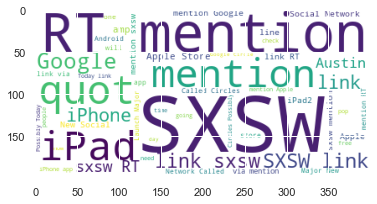

In [54]:
from wordcloud import WordCloud, STOPWORDS
wc = WordCloud(background_color='white',
                    stopwords =  set(STOPWORDS),
                    max_words = 50, 
                    random_state = 42,)
wc.generate(' '.join(train['Product_Description']))
plt.imshow(wc)

# Text Classification

In [55]:
from sklearn.model_selection import train_test_split

X = train['Product_Description']
y = train['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


# Multinomial NB

_________________________Classification Report_________________________
              precision    recall  f1-score   support

  Cannot say       0.00      0.00      0.00         0
    Negative       0.01      1.00      0.02         1
    Positive       0.96      0.66      0.78      1130
No sentiment       0.27      0.74      0.39       142

    accuracy                           0.67      1273
   macro avg       0.31      0.60      0.30      1273
weighted avg       0.89      0.67      0.74      1273

_________________________Evaluation Metrics_________________________


Accuracy: 0.667714
Weighted Precision :0.885209


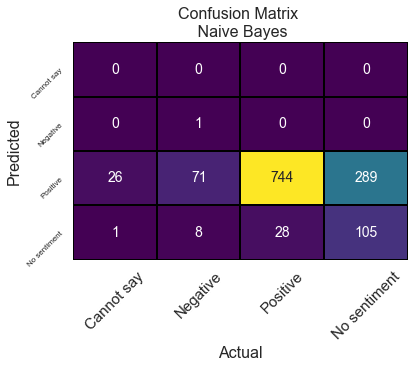

In [56]:
nb = Pipeline([('vect', TfidfVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB())
              ])

nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

print("_"*25+"Classification Report"+"_"*25)
print(classification_report(y_pred,y_test,target_names=['Cannot say','Negative','Positive','No sentiment'],zero_division=0))
print("_"*25+"Evaluation Metrics"+"_"*25)
print("\n")
print("Accuracy: %f" % accuracy_score(y_pred,y_test))
print("Weighted Precision :%f" % precision_score(y_pred,y_test,average="weighted"))

cm=confusion_matrix(y_pred,y_test)
g=sns.heatmap(cm,annot=True,fmt='d',linewidths=1,linecolor='black',
                   annot_kws={"size":14},cmap='viridis',cbar=False)
g.set_xticklabels(['Cannot say','Negative','Positive','No sentiment'],fontsize = 15,rotation=45)
g.set_yticklabels(['Cannot say','Negative','Positive','No sentiment'],fontsize = 8,rotation=45)

plt.xlabel('Actual',size=16)
plt.ylabel('Predicted',size=16)
plt.title('Confusion Matrix \n Naive Bayes',size=16)
plt.show()

# Logistic Regression

_________________________Classification Report_________________________
              precision    recall  f1-score   support

  Cannot say       0.00      0.00      0.00         0
    Negative       0.03      0.33      0.05         6
    Positive       0.90      0.69      0.78      1003
No sentiment       0.44      0.65      0.52       264

    accuracy                           0.68      1273
   macro avg       0.34      0.42      0.34      1273
weighted avg       0.80      0.68      0.73      1273

_________________________Evaluation Metrics_________________________


Accuracy: 0.683425
Weighted Precision :0.800988


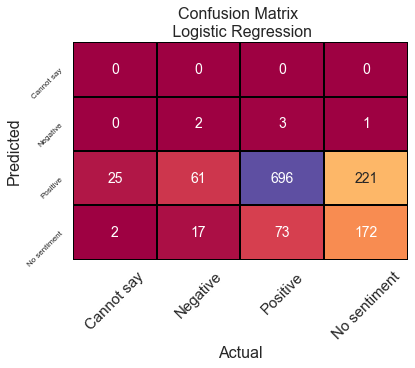

In [57]:
lr = Pipeline([('vect', TfidfVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', LogisticRegression())
              ])

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print("_"*25+"Classification Report"+"_"*25)
print(classification_report(y_pred,y_test,target_names=['Cannot say','Negative','Positive','No sentiment'],zero_division=0))
print("_"*25+"Evaluation Metrics"+"_"*25)
print("\n")
print("Accuracy: %f" % accuracy_score(y_pred,y_test))
print("Weighted Precision :%f" % precision_score(y_pred,y_test,average="weighted"))

cm=confusion_matrix(y_pred,y_test)
g=sns.heatmap(cm,annot=True,fmt='d',linewidths=1,linecolor='black',
                  annot_kws={"size":14},cmap='Spectral',cbar=False)
g.set_xticklabels(['Cannot say','Negative','Positive','No sentiment'],fontsize = 15,rotation=45)
g.set_yticklabels(['Cannot say','Negative','Positive','No sentiment'],fontsize = 8,rotation=45)

plt.xlabel('Actual',size=16)
plt.ylabel('Predicted',size=16)
plt.title('Confusion Matrix \n Logistic Regression',size=16)
plt.show()

# Linear SVC

_________________________Classification Report_________________________
              precision    recall  f1-score   support

  Cannot say       0.04      0.10      0.05        10
    Negative       0.26      0.55      0.36        38
    Positive       0.82      0.72      0.77       875
No sentiment       0.54      0.60      0.57       350

    accuracy                           0.68      1273
   macro avg       0.41      0.49      0.44      1273
weighted avg       0.72      0.68      0.70      1273

_________________________Evaluation Metrics_________________________


Accuracy: 0.680283
Weighted Precision :0.718960


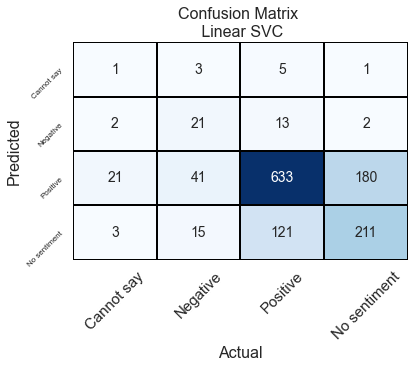

In [58]:
lsvc = Pipeline([('vect', TfidfVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', LinearSVC())
              ])

lsvc.fit(X_train, y_train)

y_pred = lsvc.predict(X_test)

print("_"*25+"Classification Report"+"_"*25)
print(classification_report(y_pred,y_test,target_names=['Cannot say','Negative','Positive','No sentiment'],zero_division=0))
print("_"*25+"Evaluation Metrics"+"_"*25)
print("\n")
print("Accuracy: %f" % accuracy_score(y_pred,y_test))
print("Weighted Precision :%f" % precision_score(y_pred,y_test,average="weighted"))

cm=confusion_matrix(y_pred,y_test)
g=sns.heatmap(cm,annot=True,fmt='d',linewidths=1,linecolor='black',
                  annot_kws={"size":14},cmap='Blues',cbar=False)
g.set_xticklabels(['Cannot say','Negative','Positive','No sentiment'],fontsize = 15,rotation=45)
g.set_yticklabels(['Cannot say','Negative','Positive','No sentiment'],fontsize = 8,rotation=45)

plt.xlabel('Actual',size=16)
plt.ylabel('Predicted',size=16)
plt.title('Confusion Matrix \n Linear SVC',size=16)
plt.show()

# Random Forest

_________________________Classification Report_________________________
              precision    recall  f1-score   support

  Cannot say       0.04      0.14      0.06         7
    Negative       0.20      0.57      0.30        28
    Positive       0.88      0.69      0.77       989
No sentiment       0.39      0.62      0.48       249

    accuracy                           0.67      1273
   macro avg       0.38      0.51      0.40      1273
weighted avg       0.77      0.67      0.70      1273

_________________________Evaluation Metrics_________________________


Accuracy: 0.670856
Weighted Precision :0.767885


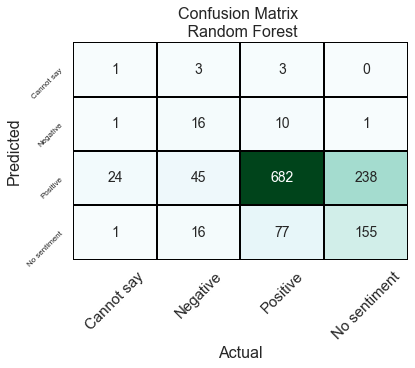

In [59]:
rf = Pipeline([('vect', TfidfVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', RandomForestClassifier(n_estimators=300))
              ])

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("_"*25+"Classification Report"+"_"*25)
print(classification_report(y_pred,y_test,target_names=['Cannot say','Negative','Positive','No sentiment'],zero_division=0))
print("_"*25+"Evaluation Metrics"+"_"*25)
print("\n")
print("Accuracy: %f" % accuracy_score(y_pred,y_test))
print("Weighted Precision :%f" % precision_score(y_pred,y_test,average="weighted"))


cm=confusion_matrix(y_pred,y_test)
g=sns.heatmap(cm,annot=True,fmt='d',linewidths=1,linecolor='black',
                  annot_kws={"size":14},cmap='BuGn',cbar=False)
g.set_xticklabels(['Cannot say','Negative','Positive','No sentiment'],fontsize = 15,rotation=45)
g.set_yticklabels(['Cannot say','Negative','Positive','No sentiment'],fontsize = 8,rotation=45)

plt.xlabel('Actual',size=16)
plt.ylabel('Predicted',size=16)
plt.title('Confusion Matrix \n Random Forest',size=16)
plt.show()

# XGB Classifier

_________________________Classification Report_________________________
              precision    recall  f1-score   support

  Cannot say       0.00      0.00      0.00         0
    Negative       0.04      0.38      0.07         8
    Positive       0.96      0.65      0.78      1144
No sentiment       0.22      0.73      0.34       121

    accuracy                           0.66      1273
   macro avg       0.31      0.44      0.30      1273
weighted avg       0.89      0.66      0.73      1273

_________________________Evaluation Metrics_________________________


Accuracy: 0.655931
Weighted Precision :0.887536


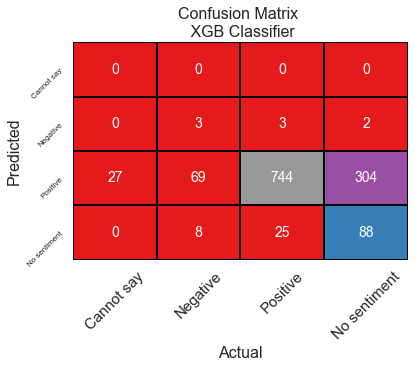

In [60]:
xgb = Pipeline([('vect', TfidfVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', XGBClassifier(objective="multi:softmax",n_estimators=200,learning_rate=0.01))
              ])

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

print("_"*25+"Classification Report"+"_"*25)
print(classification_report(y_pred,y_test,target_names=['Cannot say','Negative','Positive','No sentiment'],zero_division=0))
print("_"*25+"Evaluation Metrics"+"_"*25)
print("\n")
print("Accuracy: %f" % accuracy_score(y_pred,y_test))
print("Weighted Precision :%f" % precision_score(y_pred,y_test,average="weighted"))

cm=confusion_matrix(y_pred,y_test)
g=sns.heatmap(cm,annot=True,fmt='d',linewidths=1,linecolor='black',
                  annot_kws={"size":14},cmap='Set1',cbar=False)
g.set_xticklabels(['Cannot say','Negative','Positive','No sentiment'],fontsize = 15,rotation=45)
g.set_yticklabels(['Cannot say','Negative','Positive','No sentiment'],fontsize = 8,rotation=45)

plt.xlabel('Actual',size=16)
plt.ylabel('Predicted',size=16)
plt.title('Confusion Matrix \n XGB Classifier',size=16)
plt.show()



# CONCLUSION

Metrics:
#### Multinomial NB - Accuracy:0.66 - Weighted Precision: 0.88
#### Logistic Regression - Accuracy:0.68.3 - Weighted Precision:0.80
#### Linear SVC - Accuracy:0.68 - Weighted Precision: 0.71
#### Random Forest - Accuracy:0.67 - Weighted Precision: 0.77
####  XGB Classifier- Accuracy:0.65 - Weighted Precision: 0.88

In [56]:
test['Sentiment']= lr.predict(test.description)

No handles with labels found to put in legend.


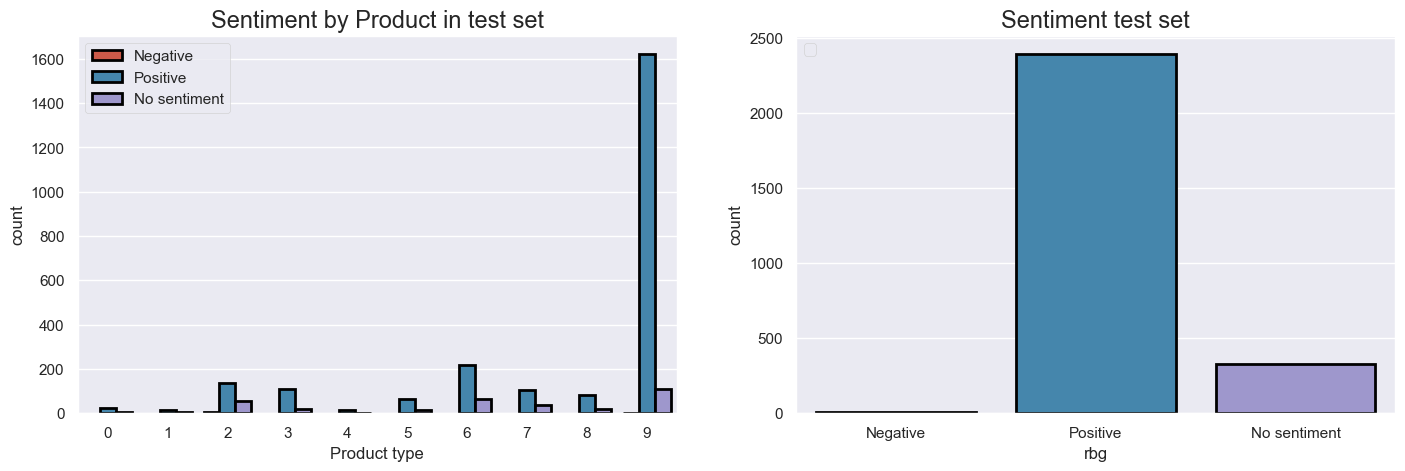

In [58]:
fig,ax = plt.subplots(ncols=2,nrows=1,dpi=100,figsize=(17,5))
sns.countplot(data=test,x="Product_Type",hue="Sentiment",edgecolor="black",ax=ax[0],linewidth=2)
ax[0].legend(loc="upper left",labels=["Negative","Positive","No sentiment"])
ax[0].set_title('Sentiment by Product in test set',size=17)
ax[0].set_xlabel("Product type")

sns.countplot(data=test,x="Sentiment",edgecolor="black",ax=ax[1],linewidth=2)
ax[1].legend(loc="upper left")
ax[1].set_title('Sentiment test set',size=17)
ax[1].set_xticklabels(["Negative","Positive","No sentiment"])
ax[1].set_xlabel("rbg")

plt.show()

 By Observing all models we got Logistic Regression - Accuracy: 68.3% - Weighted Precision: 80% as the highest